<img src="https://portafoliodigitalmodelosojcr.weebly.com/uploads/4/8/8/4/48840943/1824297_orig.jpg" align="center"/>

In [1]:
import random as r
import matplotlib.pyplot as plt
import matplotlib.ticker as plt_tick
import numpy as np

## Definición del método Monte Carlo para blackjack

In [2]:
def monte_carlo_blackjack(iterations, deck, initial_game_cards=[], saving_memory=False, ploting=False):
  win_count = 0
  win_game_cards_count = []
  for _ in range(iterations):
    game_cards = initial_game_cards[:]
    game_deck = deck[:]
    while sum(game_cards) < 21:
      card = r.choice(game_deck)
      game_deck.remove(card)
      game_cards.append(card)
    if sum(game_cards) == 21:
      win_count += 1
      if not saving_memory:
        win_game_cards_count.append(len(game_cards))
  #print('Gané {} veces y perdí {} veces, la probabilidad de ganar es de {}'.format(win_count, iterations-win_count, win_count/iterations))
  if not saving_memory:
    if ploting:
      win_game_cards_unique = list(set(win_game_cards_count))
      win_game_cards_weight = []
      win_game_cards_percentage = []
      win_game_cards_distribution = []
      for n in win_game_cards_unique:
        n_count = win_game_cards_count.count(n)
        win_game_cards_weight.append(n_count)
        win_game_cards_percentage.append('{:.2f}%'.format(n_count*100/len(win_game_cards_count)))
        win_game_cards_distribution.append(float('{:.2f}'.format(n_count/len(win_game_cards_count))))
      chart = plt.bar(win_game_cards_unique, win_game_cards_distribution, alpha=0.5)
      table = plt.table(cellText=[win_game_cards_percentage, win_game_cards_weight],
                        rowLabels=['Porcentaje', 'Cantidad'],
                        colLabels=win_game_cards_unique,
                        loc='bottom')
      plt.subplots_adjust(left=0.2, bottom=0.2)
      plt.xticks([])
      plt.show();

      plt.show();
  else:
      #pass
      print(game_cards)
  #print("veces ganadas {}".format(win_count))
  #print("repeticiones {}".format(iterations))
  #print("Probabilidad de ganar {}".format(win_count/iterations))
  return win_count/iterations, win_game_cards_count

## Punto 1

In [3]:
# standard decks
std_spanish_deck = [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] 
std_poker_deck = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

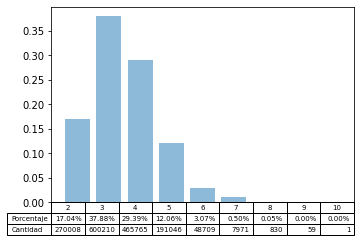

Probabilidad de ganar 0.1584599
El promedio de cartas usadas para ganar 3.479850738262488


In [4]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, std_spanish_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {}".format(sum(win_cards_sum)/len(win_cards_sum)))

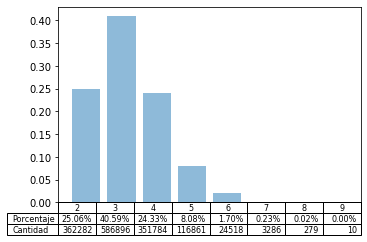

Probabilidad de ganar 0.1445916
El promedio de cartas usadas para ganar 3.2153493010658987


In [5]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, std_poker_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {}".format(sum(win_cards_sum)/len(win_cards_sum)))

## Punto 2

In [6]:
# normal weight decks
nrm_spanish_deck = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
nrm_poker_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

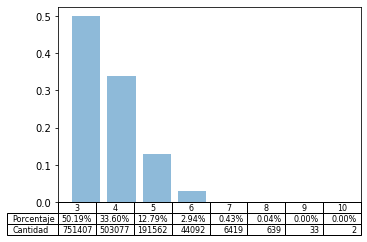

Probabilidad de ganar 0.1497231
El promedio de cartas usadas para ganar 3.6996649147659912


In [7]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, nrm_spanish_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {}".format(sum(win_cards_sum)/len(win_cards_sum)))

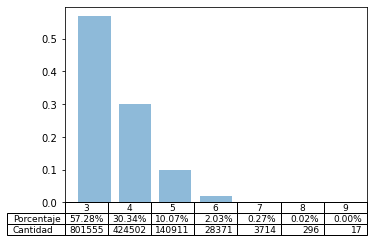

Probabilidad de ganar 0.1399366
El promedio de cartas usadas para ganar 3.577315012655731


In [8]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, nrm_poker_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {}".format(sum(win_cards_sum)/len(win_cards_sum)))

## Punto 3

In [9]:
def custom_deck(base_deck, parts_of_deck=2, hand=[]):
  auxiliar_deck = base_deck[:]
  for card in hand:
    auxiliar_deck.remove(card)
  game_deck = []
  for _ in range(int(len(base_deck)/parts_of_deck)):
    card = r.choice(auxiliar_deck)
    auxiliar_deck.remove(card)
    game_deck.append(card)
  return game_deck

In [10]:
spanish_cool_deck = custom_deck(std_spanish_deck, hand=[7, 7, 5])
print(spanish_cool_deck)

[6, 9, 6, 4, 12, 10, 10, 8, 10, 4, 11, 3, 12, 1, 9, 4, 5, 7, 11, 6, 2, 11, 5]


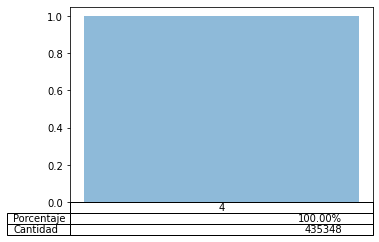

Probabilidad de ganar 0.0435348
El promedio de cartas usadas para ganar 4.0


In [11]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_cool_deck, [7, 7, 5], ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {}".format(sum(win_cards_sum)/len(win_cards_sum)))

## Punto 4

In [12]:
spanish_hot_deck = [1, 1, 1, 1, 2, 2, 2, 2]
poker_hot_deck = [1, 1, 1, 1, 2, 2, 2, 2]
spanish_cold_deck = [8, 8, 8, 8, 9, 9, 9, 9]
poker_cold_deck = [8, 8, 8, 8, 9, 9, 9, 9]

In [13]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_hot_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad analítica de ganar {}".format((1/2)+((1/2)*(3/8))))
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 2]
Probabilidad analítica de ganar 0.6875
Probabilidad de ganar 0.714388


In [14]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_cold_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad analítica de ganar {}".format(0))
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 9]
Probabilidad analítica de ganar 0
Probabilidad de ganar 0.0


In [15]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, poker_hot_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad analítica de ganar {}".format((1/2)+((1/2)*(3/8))))
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 1, 2]
Probabilidad analítica de ganar 0.6875
Probabilidad de ganar 0.7142149


In [16]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, poker_cold_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad analítica de ganar {}".format(0))
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 8]
Probabilidad analítica de ganar 0
Probabilidad de ganar 0.0


## Punto 5

In [17]:
balances = []
total_sum_balances = 0 
for i in range (0,10000):
  bet_hot_deck = 1000
  bet_cold_deck = 10
  balance = 0
  for weekend in range (0,600):
    if r.random() <= 0.1:
      balance -= bet_hot_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, spanish_hot_deck, [7,7,5])
      
      if probability == 1:
        #balance += bet_hot_deck*1.5
        balance += bet_hot_deck*2
    else:
      balance -= bet_cold_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, nrm_spanish_deck)

      if probability == 1:
        #balance += bet_cold_deck*1.5
        balance += bet_cold_deck*2
  balances.append(balance)
  total_sum_balances += balance

print('El promedio de los balances obtenidos es: {}'.format(total_sum_balances/len(balances)))
#plt.hist(balances, bins=30)
#plt.show();


El promedio de los balances obtenidos es: 21915.775


In [18]:
balances = []
total_sum_balances = 0 
for i in range (0,10000):
  bet_hot_deck = 1000
  bet_cold_deck = 10
  balance = 0
  for weekend in range (0,600):
    if r.random() <= 0.1:
      balance -= bet_hot_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, poker_hot_deck, [7,7,5])
      
      if probability == 1:
        #balance += bet_hot_deck*1.5
        balance += bet_hot_deck*2
    else:
      balance -= bet_cold_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, nrm_poker_deck)

      if probability == 1:
        #balance += bet_cold_deck*1.5
        balance += bet_cold_deck*2
  balances.append(balance)
  total_sum_balances += balance

print('El promedio de los balances obtenidos es: {}'.format(total_sum_balances/len(balances)))

El promedio de los balances obtenidos es: 22022.71
